In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode, median

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
#df = pd.read_csv("sample_data/loan1.csv")
df = pd.read_csv("sample_data/LoanApplicantData.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


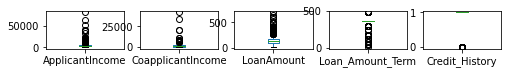

In [ ]:
## This plot helps to identify outliners of data
# box and whisker plots

df.plot(kind='box', subplots=True, layout=(12,12), sharex=False, figsize=(20,10))
plt.show()


In [ ]:
def findIQROutier(column) :
  Q1 = np.percentile(column, 25)
  Q3 = np.percentile(column, 75)

  IQR = Q3 - Q1
  Lower = Q1 - (1.5 * IQR)
  Higher = Q3 + (1.5 * IQR)

  x = column[column > Higher]
  y = column[column < Lower]
  pd.concat([x,y], axis=1)
  
  return x
    

In [ ]:
print("CoapplicantIncome Outliers:")
print(findIQROutier(df['CoapplicantIncome']))

print("ApplicantIncome Outliers:")
print(findIQROutier(df['ApplicantIncome']))

print("LoanAmount Outliers:")
print(findIQROutier(df['LoanAmount']))

print("LoanAmountTerm Outliers:")
print(findIQROutier(df['Loan_Amount_Term']))

print("Credit_History Outliers:")
print(findIQROutier(df['Credit_History']))

# handler outliers: Considered as missing value & handle in that way

CoapplicantIncome Outliers:
9      10968.0
12      8106.0
38      7210.0
122     8980.0
135     7750.0
177    11300.0
180     7250.0
253     7101.0
349     6250.0
372     7873.0
402    20000.0
417    20000.0
444     8333.0
506     6667.0
513     6666.0
523     7166.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64
ApplicantIncome Outliers:
9      12841
34     12500
54     11500
67     10750
102    13650
106    11417
115    14583
119    10408
126    23803
128    10513
130    20166
138    14999
144    11757
146    14866
155    39999
171    51763
183    33846
185    39147
191    12000
199    11000
254    16250
258    14683
271    11146
278    14583
284    20667
308    20233
324    15000
333    63337
369    19730
370    15759
409    81000
424    14880
432    12876
438    10416
443    37719
467    16692
475    16525
478    16667
483    10833
487    18333
493    17263
506    20833
509    13262
525    17500
533    11250
534    18165
561    19484
572    16666
594    16120

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# DropNa 
#df.dropna(inplace=True)

gender_mode = mode(df['Gender'])
married_mode = mode(df['Married'])
dependents_mode = mode(df['Dependents'])
self_employed_mode = mode(df['Self_Employed'])
loanamount_mean = np.mean(df['LoanAmount'])
loanamount_term_mean = np.mean(df['Loan_Amount_Term'])
credit_history_mode = mode(df['Credit_History'])

df['Gender'].fillna(gender_mode, inplace=True)
df['Married'].fillna(married_mode, inplace=True)
df['Dependents'].fillna(dependents_mode, inplace=True)
df['Self_Employed'].fillna(self_employed_mode, inplace=True)
df['LoanAmount'].fillna(loanamount_mean, inplace=True)
df['Loan_Amount_Term'].fillna(loanamount_term_mean, inplace=True)
df['Credit_History'].fillna(credit_history_mode, inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.set_index('Loan_ID')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


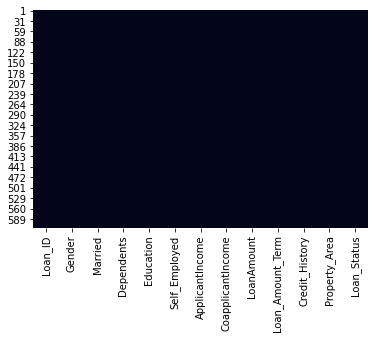

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

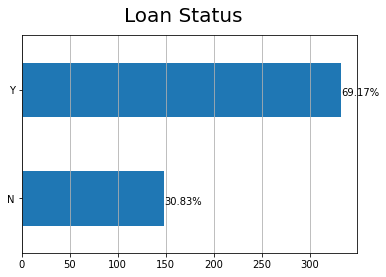

In [ ]:
y = "Loan Status"
ax = df['Loan_Status'].value_counts().sort_values().plot(kind="barh")
## further lines not needed actually, we can plot the directly by printing ax only
totals = []
for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
  ax.text(
      i.get_width()+.3, 
      i.get_y()+.20, 
      str(round((i.get_width()/total)*100, 2))+'%',
      fontsize=10, color='black')
ax.grid(axis='x')
plt.suptitle(y, fontsize=20)
plt.show()

In [ ]:
# remove "+" from values like 3+
df['Dependents'] = df['Dependents'].apply(lambda x: x.replace('+', '') if isinstance(x, str) else '')

df_male = pd.get_dummies(df['Gender'], drop_first=True, )
df['Gender'] = df_male
#df = pd.concat([df, df_male], axis=1)

# # create new column with Married values
df_married = pd.get_dummies(df['Married'], prefix="Is_Married", drop_first=True)
df['Married'] = df_married
#df = pd.concat([df, df_married], axis=1)


# # create new column with SelfEmployed values
df_self_employed = pd.get_dummies(df['Self_Employed'], prefix="Is_self_Employeed", drop_first=True)
df['Self_Employed'] = df_self_employed
#df = pd.concat([df, df_self_employed], axis=1)

#Python Local Labeling
# Need to choose another way which will more dynamic

df.Property_Area[df.Property_Area == 'Urban']=1
df.Property_Area[df.Property_Area == 'Semiurban']=2
df.Property_Area[df.Property_Area == 'Rural']=3

df.Education[df.Education == 'Graduate']=1
df.Education[df.Education == 'Not Graduate']=2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0,2,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,3,Y
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,3,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,Y


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

def IsCorrelated(tgt, col):
 model = smf.ols(col+' ~ '+tgt, data=df).fit()
 table = sm.stats.anova_lm(model)
 p = table["PR(>F)"][0]
 coeff, p = None, round(p, 3)
 conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
 print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")
 return p < 0.05
  

In [ ]:
target = "Loan_Status"

feature_names = list()
if(IsCorrelated(target, 'Gender')):
  feature_names.append('Gender')
if(IsCorrelated(target, 'Married')):
  feature_names.append('Married')
#if(IsCorrelated(target, 'Dependents')):
#  feature_names.append('Dependents')
if(IsCorrelated(target, 'Self_Employed')):
  feature_names.append('Self_Employed')
if(IsCorrelated(target, 'ApplicantIncome')):
  feature_names.append('ApplicantIncome')
if(IsCorrelated(target, 'CoapplicantIncome')):
  feature_names.append('CoapplicantIncome')
if(IsCorrelated(target, 'LoanAmount')):
  feature_names.append('LoanAmount')
if(IsCorrelated(target, 'Loan_Amount_Term')):
  feature_names.append('Loan_Amount_Term')
if(IsCorrelated(target, 'Credit_History')):
  feature_names.append('Credit_History')
#if(IsCorrelated(target, 'Property_Area')):
#  feature_names.append('Property_Area')

feature_names

Anova F: the variables are Non-Correlated (p-value: 0.158)
Anova F: the variables are Correlated (p-value: 0.014)
Anova F: the variables are Non-Correlated (p-value: 0.448)
Anova F: the variables are Non-Correlated (p-value: 0.345)
Anova F: the variables are Non-Correlated (p-value: 0.284)
Anova F: the variables are Non-Correlated (p-value: 0.116)
Anova F: the variables are Non-Correlated (p-value: 0.865)
Anova F: the variables are Correlated (p-value: 0.0)


['Married', 'Credit_History']

In [ ]:
features = ['Gender', 'Married', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

X = df[features]
y = df['Loan_Status']

print("X size", X.size)
print("Y size", y.size)

X size 3840
Y size 480


In [ ]:
def featureScaling(X_train,X_test):
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test= sc.transform(X_test)
    return X_train,X_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)
X_train, X_test = featureScaling(X_train, X_test)
print(y_test)

18     N
161    N
182    Y
340    N
216    N
      ..
532    N
534    Y
142    Y
591    N
243    Y
Name: Loan_Status, Length: 96, dtype: object


In [ ]:
# LR = LogisticRegression(solver='lbfgs', dual=False).fit(X_train, y_train)
# y_pred = LR.predict(X_test)


# print(y_pred)
# LR.score(X_test, y_test)

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.naive_bayes import CategoricalNB

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

# clf = CategoricalNB().fit(X_train, y_train)
# clf_pred = clf.predict(X_test)

# clf.score(X_test, y_test)

In [4]:


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

NameError: name 'GaussianNB' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for name, model in models:
  y_pred = model.fit(X_train, y_train).predict(X_test)
  print('Prediction: %s %f ' % (name, (y_test != y_pred).sum()))
  rs = model.score(X_test, y_test)
  score = round(rs, 4) * 100
  print("Score: ", score)

  # Evaluate predictions
  print(accuracy_score(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  print()
  print()


Prediction: LR 23.000000 
Score:  76.03999999999999
0.7604166666666666
[[12 23]
 [ 0 61]]
              precision    recall  f1-score   support

           N       1.00      0.34      0.51        35
           Y       0.73      1.00      0.84        61

    accuracy                           0.76        96
   macro avg       0.86      0.67      0.68        96
weighted avg       0.83      0.76      0.72        96



Prediction: KNN 22.000000 
Score:  77.08
0.7708333333333334
[[13 22]
 [ 0 61]]
              precision    recall  f1-score   support

           N       1.00      0.37      0.54        35
           Y       0.73      1.00      0.85        61

    accuracy                           0.77        96
   macro avg       0.87      0.69      0.69        96
weighted avg       0.83      0.77      0.74        96



Prediction: DT 31.000000 
Score:  67.71000000000001
0.6770833333333334
[[19 16]
 [15 46]]
              precision    recall  f1-score   support

           N       0.56     

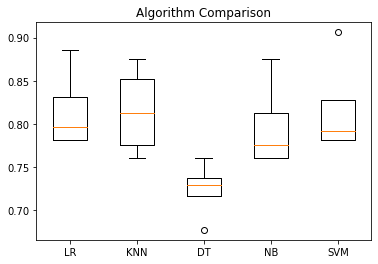

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()